In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

In [2]:
Population9 = "resources/population2009.csv"
population09 = pd.read_csv(Population9)
#open csv

In [3]:
population09.head(50)

,State,1-Jul-09,1-Jul-08,1-Jul-07,1-Jul-06,1-Jul-05,1-Jul-04,1-Jul-03,1-Jul-02
0,Alabama,"4,708,708","4,677,464","4,637,904","4,597,688","4,545,049","4,512,190","4,490,591","4,472,420"
1,Alaska,"698,473","688,125","682,297","677,325","669,488","661,569","650,884","642,691"
2,Arizona,"6,595,778","6,499,377","6,362,241","6,192,100","5,974,834","5,759,425","5,591,206","5,452,108"
3,Arkansas,"2,889,450","2,867,764","2,842,194","2,815,097","2,776,221","2,746,161","2,722,291","2,704,732"
4,California,"36,961,664","36,580,371","36,226,122","35,979,208","35,795,255","35,558,419","35,251,107","34,876,194"
5,Colorado,"5,024,748","4,935,213","4,842,259","4,753,044","4,660,780","4,599,681","4,548,775","4,504,265"
6,Connecticut,"3,518,288","3,502,932","3,488,633","3,485,162","3,477,416","3,474,610","3,467,673","3,448,382"
7,Delaware,"885,122","876,211","864,896","853,022","839,906","826,639","814,905","804,131"
8,District of Columbia,"599,657","590,074","586,409","583,978","582,049","579,796","577,777","579,585"
9,Florida,"18,537,969","18,423,878","18,277,888","18,088,505","17,783,868","17,375,259","16,981,183","16,680,309"


In [4]:
Population13 = "resources/poppulation2013.csv"
population013 = pd.read_csv(Population13,encoding="cp1252")

In [5]:

pop13 = population013[["State","2010","2011","2012","2013"]]


In [6]:
pop13

,State,2010,2011,2012,2013
0,Alabama,"4,785,161","4,801,108","4,816,089","4,830,533"
1,Alaska,"714,021","722,720","731,228","737,442"
2,Arizona,"6,408,208","6,468,732","6,553,262","6,630,799"
3,Arkansas,"2,922,394","2,938,538","2,949,499","2,957,957"
4,California,"37,334,079","37,700,034","38,056,055","38,414,128"
5,Colorado,"5,048,254","5,119,480","5,191,731","5,271,132"
6,Connecticut,"3,579,717","3,589,759","3,593,541","3,597,168"
7,Delaware,"899,791","907,916","917,099","925,353"
8,District of Columbia,"605,126","620,472","635,342","649,540"
9,Florida,"18,849,890","19,105,533","19,352,021","19,594,467"


In [7]:
dict = {"1-Jul-09": "2009","1-Jul-08":"2008","1-Jul-07":"2007",
        "1-Jul-06":"2006","1-Jul-05":"2005","1-Jul-04":"2004","1-Jul-03":"2003","1-Jul-02":"2002"}
pop09 = population09.rename(columns = dict)


In [8]:
pop09

,State,2009,2008,2007,2006,2005,2004,2003,2002
0,Alabama,"4,708,708","4,677,464","4,637,904","4,597,688","4,545,049","4,512,190","4,490,591","4,472,420"
1,Alaska,"698,473","688,125","682,297","677,325","669,488","661,569","650,884","642,691"
2,Arizona,"6,595,778","6,499,377","6,362,241","6,192,100","5,974,834","5,759,425","5,591,206","5,452,108"
3,Arkansas,"2,889,450","2,867,764","2,842,194","2,815,097","2,776,221","2,746,161","2,722,291","2,704,732"
4,California,"36,961,664","36,580,371","36,226,122","35,979,208","35,795,255","35,558,419","35,251,107","34,876,194"
5,Colorado,"5,024,748","4,935,213","4,842,259","4,753,044","4,660,780","4,599,681","4,548,775","4,504,265"
6,Connecticut,"3,518,288","3,502,932","3,488,633","3,485,162","3,477,416","3,474,610","3,467,673","3,448,382"
7,Delaware,"885,122","876,211","864,896","853,022","839,906","826,639","814,905","804,131"
8,District of Columbia,"599,657","590,074","586,409","583,978","582,049","579,796","577,777","579,585"
9,Florida,"18,537,969","18,423,878","18,277,888","18,088,505","17,783,868","17,375,259","16,981,183","16,680,309"


In [9]:
Population = pd.merge(pop09,pop13, how="inner", on="State")

In [10]:
Population

,State,2009,2008,2007,2006,2005,2004,2003,2002,2010,2011,2012,2013
0,Alabama,"4,708,708","4,677,464","4,637,904","4,597,688","4,545,049","4,512,190","4,490,591","4,472,420","4,785,161","4,801,108","4,816,089","4,830,533"
1,Alaska,"698,473","688,125","682,297","677,325","669,488","661,569","650,884","642,691","714,021","722,720","731,228","737,442"
2,Arizona,"6,595,778","6,499,377","6,362,241","6,192,100","5,974,834","5,759,425","5,591,206","5,452,108","6,408,208","6,468,732","6,553,262","6,630,799"
3,Arkansas,"2,889,450","2,867,764","2,842,194","2,815,097","2,776,221","2,746,161","2,722,291","2,704,732","2,922,394","2,938,538","2,949,499","2,957,957"
4,California,"36,961,664","36,580,371","36,226,122","35,979,208","35,795,255","35,558,419","35,251,107","34,876,194","37,334,079","37,700,034","38,056,055","38,414,128"
5,Colorado,"5,024,748","4,935,213","4,842,259","4,753,044","4,660,780","4,599,681","4,548,775","4,504,265","5,048,254","5,119,480","5,191,731","5,271,132"
6,Connecticut,"3,518,288","3,502,932","3,488,633","3,485,162","3,477,416","3,474,610","3,467,673","3,448,382","3,579,717","3,589,759","3,593,541","3,597,168"
7,Delaware,"885,122","876,211","864,896","853,022","839,906","826,639","814,905","804,131","899,791","907,916","917,099","925,353"
8,District of Columbia,"599,657","590,074","586,409","583,978","582,049","579,796","577,777","579,585","605,126","620,472","635,342","649,540"
9,Florida,"18,537,969","18,423,878","18,277,888","18,088,505","17,783,868","17,375,259","16,981,183","16,680,309","18,849,890","19,105,533","19,352,021","19,594,467"


In [11]:
Pop =Population.melt(id_vars=["State"], 
        var_name="Date", 
        value_name="Population")

In [12]:
Pop

,State,Date,Population
0,Alabama,2009,"4,708,708"
1,Alaska,2009,"698,473"
2,Arizona,2009,"6,595,778"
3,Arkansas,2009,"2,889,450"
4,California,2009,"36,961,664"
...,...,...,...
619,Washington,2013,"6,973,281"
620,West Virginia,2013,"1,852,985"
621,Wisconsin,2013,"5,743,653"
622,Wyoming,2013,"583,131"


In [13]:
Grads2 = "resources/Grads_db2.csv"
Grads = pd.read_csv(Grads2)
Inst2 = "resources/Inst2.csv"
Schools = pd.read_csv(Inst2)

In [14]:
len(Grads)

15492

In [15]:
Grads.head()

,Unnamed: 0,unitid,year,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,0,100654,2002,680.0,139.0,263.0,20.4,38.7
1,1,100654,2003,748.0,153.0,288.0,20.5,38.5
2,2,100654,2004,955.0,173.0,314.0,18.1,32.9
3,3,100654,2005,1046.0,91.0,339.0,8.7,32.4
4,4,100654,2006,967.0,112.0,326.0,11.6,33.7


In [16]:
Grads2 = pd.merge(Grads,Schools, how="outer", on="unitid")

In [17]:
len(Grads2)

15492

In [18]:
Grads2.head()

,Unnamed: 0_x,unitid,year,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate,Unnamed: 0_y,chronname,city,state,level,control,student_count,med_sat_value,aid_value,grad_100_value,grad_150_value
0,0,100654,2002,680.0,139.0,263.0,20.4,38.7,0,Alabama A&M University,Normal,Alabama,4-year,Public,4051,823.0,7142.0,10.0,29.1
1,1,100654,2003,748.0,153.0,288.0,20.5,38.5,0,Alabama A&M University,Normal,Alabama,4-year,Public,4051,823.0,7142.0,10.0,29.1
2,2,100654,2004,955.0,173.0,314.0,18.1,32.9,0,Alabama A&M University,Normal,Alabama,4-year,Public,4051,823.0,7142.0,10.0,29.1
3,3,100654,2005,1046.0,91.0,339.0,8.7,32.4,0,Alabama A&M University,Normal,Alabama,4-year,Public,4051,823.0,7142.0,10.0,29.1
4,4,100654,2006,967.0,112.0,326.0,11.6,33.7,0,Alabama A&M University,Normal,Alabama,4-year,Public,4051,823.0,7142.0,10.0,29.1


In [19]:
Grads = Grads2[["unitid","state","year","control","grad_cohort","grad_100","grad_150"]]

In [20]:
Grads

,unitid,state,year,control,grad_cohort,grad_100,grad_150
0,100654,Alabama,2002,Public,680.0,139.0,263.0
1,100654,Alabama,2003,Public,748.0,153.0,288.0
2,100654,Alabama,2004,Public,955.0,173.0,314.0
3,100654,Alabama,2005,Public,1046.0,91.0,339.0
4,100654,Alabama,2006,Public,967.0,112.0,326.0
...,...,...,...,...,...,...,...
15487,454184,New York,2012,Private not-for-profit,1.0,0.0,0.0
15488,454184,New York,2013,Private not-for-profit,1.0,1.0,1.0
15489,462354,California,2011,Private not-for-profit,0.0,0.0,0.0
15490,462354,California,2012,Private not-for-profit,1.0,0.0,0.0


In [21]:
ByStateYear = Grads.groupby(["state","year"],as_index=False).sum()

In [22]:
ByStateYear

,state,year,unitid,grad_cohort,grad_100,grad_150
0,Alabama,2002,2232644,4661.0,801.0,1810.0
1,Alabama,2003,2232644,4602.0,722.0,1688.0
2,Alabama,2004,2232644,5258.0,730.0,1837.0
3,Alabama,2005,2232644,5857.0,858.0,2155.0
4,Alabama,2006,2232644,5596.0,892.0,2036.0
...,...,...,...,...,...,...
607,Wyoming,2009,240727,20.0,0.0,5.0
608,Wyoming,2010,240727,15.0,0.0,7.0
609,Wyoming,2011,240727,15.0,2.0,5.0
610,Wyoming,2012,240727,28.0,4.0,7.0


In [23]:
Pop["Date"]= Pop["Date"].astype(int)

In [24]:
ByStateYearplusPop = pd.merge(ByStateYear,Pop, how="inner", left_on =["state","year"], right_on=["State","Date"])

In [25]:
ByStateYearplusPop

,state,year,unitid,grad_cohort,grad_100,grad_150,State,Date,Population
0,Alabama,2002,2232644,4661.0,801.0,1810.0,Alabama,2002,"4,472,420"
1,Alabama,2003,2232644,4602.0,722.0,1688.0,Alabama,2003,"4,490,591"
2,Alabama,2004,2232644,5258.0,730.0,1837.0,Alabama,2004,"4,512,190"
3,Alabama,2005,2232644,5857.0,858.0,2155.0,Alabama,2005,"4,545,049"
4,Alabama,2006,2232644,5596.0,892.0,2036.0,Alabama,2006,"4,597,688"
...,...,...,...,...,...,...,...,...,...
607,Wyoming,2009,240727,20.0,0.0,5.0,Wyoming,2009,"544,270"
608,Wyoming,2010,240727,15.0,0.0,7.0,Wyoming,2010,"564,516"
609,Wyoming,2011,240727,15.0,2.0,5.0,Wyoming,2011,"567,768"
610,Wyoming,2012,240727,28.0,4.0,7.0,Wyoming,2012,"577,080"


In [26]:
ByStateYearplusPop["Total100pls150"] = ByStateYearplusPop["grad_100"] + ByStateYearplusPop["grad_150"]

In [27]:
ByStateYearplusPop = ByStateYearplusPop[["state","year","grad_100","grad_150","Population","Total100pls150"]]

In [28]:
ByStateYearplusPop

,state,year,grad_100,grad_150,Population,Total100pls150
0,Alabama,2002,801.0,1810.0,"4,472,420",2611.0
1,Alabama,2003,722.0,1688.0,"4,490,591",2410.0
2,Alabama,2004,730.0,1837.0,"4,512,190",2567.0
3,Alabama,2005,858.0,2155.0,"4,545,049",3013.0
4,Alabama,2006,892.0,2036.0,"4,597,688",2928.0
...,...,...,...,...,...,...
607,Wyoming,2009,0.0,5.0,"544,270",5.0
608,Wyoming,2010,0.0,7.0,"564,516",7.0
609,Wyoming,2011,2.0,5.0,"567,768",7.0
610,Wyoming,2012,4.0,7.0,"577,080",11.0


In [29]:
ByStateYearplusPop= ByStateYearplusPop.replace(to_replace=',',value='', regex = True)

In [30]:
ByStateYearplusPop["Population"]= ByStateYearplusPop["Population"].astype(float)

In [31]:
ByStateYearplusPop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 0 to 611
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           612 non-null    object 
 1   year            612 non-null    int64  
 2   grad_100        612 non-null    float64
 3   grad_150        612 non-null    float64
 4   Population      612 non-null    float64
 5   Total100pls150  612 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 33.5+ KB


In [32]:
ByStateYearplusPop

,state,year,grad_100,grad_150,Population,Total100pls150
0,Alabama,2002,801.0,1810.0,4472420.0,2611.0
1,Alabama,2003,722.0,1688.0,4490591.0,2410.0
2,Alabama,2004,730.0,1837.0,4512190.0,2567.0
3,Alabama,2005,858.0,2155.0,4545049.0,3013.0
4,Alabama,2006,892.0,2036.0,4597688.0,2928.0
...,...,...,...,...,...,...
607,Wyoming,2009,0.0,5.0,544270.0,5.0
608,Wyoming,2010,0.0,7.0,564516.0,7.0
609,Wyoming,2011,2.0,5.0,567768.0,7.0
610,Wyoming,2012,4.0,7.0,577080.0,11.0


In [33]:
ByStateYearplusPop["TotalPercapita"] = (ByStateYearplusPop["Total100pls150"]/(ByStateYearplusPop["Population"]))*100000

In [34]:
ByStateYearplusPop

,state,year,grad_100,grad_150,Population,Total100pls150,TotalPercapita
0,Alabama,2002,801.0,1810.0,4472420.0,2611.0,58.380027
1,Alabama,2003,722.0,1688.0,4490591.0,2410.0,53.667769
2,Alabama,2004,730.0,1837.0,4512190.0,2567.0,56.890335
3,Alabama,2005,858.0,2155.0,4545049.0,3013.0,66.291915
4,Alabama,2006,892.0,2036.0,4597688.0,2928.0,63.684182
...,...,...,...,...,...,...,...
607,Wyoming,2009,0.0,5.0,544270.0,5.0,0.918662
608,Wyoming,2010,0.0,7.0,564516.0,7.0,1.240000
609,Wyoming,2011,2.0,5.0,567768.0,7.0,1.232898
610,Wyoming,2012,4.0,7.0,577080.0,11.0,1.906148


In [35]:
MeanMax = ByStateYearplusPop.groupby(['year'])["TotalPercapita"].max()

In [36]:
MeanMax

year
2002    221.192750
2003    236.942627
2004    256.297042
2005    230.221167
2006    301.381216
2007    316.843705
2008    297.759264
2009    315.180178
2010    329.683405
2011    296.226099
2012    311.170991
2013    279.890384
Name: TotalPercapita, dtype: float64

In [37]:
inx = ByStateYearplusPop.groupby(['year'])["TotalPercapita"].transform(max)==ByStateYearplusPop["TotalPercapita"]

In [38]:
ByStateYearplusPop[inx]

,state,year,grad_100,grad_150,Population,Total100pls150,TotalPercapita
96,District of Columbia,2002,563.0,719.0,579585.0,1282.0,221.192750
97,District of Columbia,2003,524.0,845.0,577777.0,1369.0,236.942627
98,District of Columbia,2004,606.0,880.0,579796.0,1486.0,256.297042
99,District of Columbia,2005,550.0,790.0,582049.0,1340.0,230.221167
100,District of Columbia,2006,723.0,1037.0,583978.0,1760.0,301.381216
101,District of Columbia,2007,798.0,1060.0,586409.0,1858.0,316.843705
102,District of Columbia,2008,731.0,1026.0,590074.0,1757.0,297.759264
103,District of Columbia,2009,829.0,1061.0,599657.0,1890.0,315.180178
104,District of Columbia,2010,841.0,1154.0,605126.0,1995.0,329.683405
105,District of Columbia,2011,787.0,1051.0,620472.0,1838.0,296.226099


In [39]:
#Testing = ByStateYearplusPop.loc[ByStateYearplusPop["state"]=="Pennsylvania"]

In [40]:
#Testing

In [41]:
#Testing2 = ByStateYearplusPop.loc[ByStateYearplusPop["state"]=="North Carolina"]

In [42]:
#Testing2

In [43]:
inx2 = ByStateYearplusPop.groupby(['year'])["Total100pls150"].transform(max)==ByStateYearplusPop["Total100pls150"]

In [44]:
ByStateYearplusPop[inx2]

,state,year,grad_100,grad_150,Population,Total100pls150,TotalPercapita
396,North Carolina,2002,1832.0,3171.0,8316617.0,5003.0,60.156672
397,North Carolina,2003,1819.0,3408.0,8416451.0,5227.0,62.104562
398,North Carolina,2004,1834.0,3430.0,8531283.0,5264.0,61.702325
399,North Carolina,2005,2151.0,3726.0,8669452.0,5877.0,67.789752
400,North Carolina,2006,2126.0,3808.0,8866977.0,5934.0,66.922470
401,North Carolina,2007,2213.0,4003.0,9064074.0,6216.0,68.578434
402,North Carolina,2008,2146.0,4016.0,9247134.0,6162.0,66.636863
403,North Carolina,2009,2218.0,4340.0,9380884.0,6558.0,69.908124
404,North Carolina,2010,2189.0,4320.0,9558979.0,6509.0,68.093046
405,North Carolina,2011,2237.0,4525.0,9651025.0,6762.0,70.065097


In [45]:
ByStateYearplusPop

,state,year,grad_100,grad_150,Population,Total100pls150,TotalPercapita
0,Alabama,2002,801.0,1810.0,4472420.0,2611.0,58.380027
1,Alabama,2003,722.0,1688.0,4490591.0,2410.0,53.667769
2,Alabama,2004,730.0,1837.0,4512190.0,2567.0,56.890335
3,Alabama,2005,858.0,2155.0,4545049.0,3013.0,66.291915
4,Alabama,2006,892.0,2036.0,4597688.0,2928.0,63.684182
...,...,...,...,...,...,...,...
607,Wyoming,2009,0.0,5.0,544270.0,5.0,0.918662
608,Wyoming,2010,0.0,7.0,564516.0,7.0,1.240000
609,Wyoming,2011,2.0,5.0,567768.0,7.0,1.232898
610,Wyoming,2012,4.0,7.0,577080.0,11.0,1.906148


In [46]:
Schools

,Unnamed: 0,unitid,chronname,city,state,level,control,student_count,med_sat_value,aid_value,grad_100_value,grad_150_value
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,4051,823.0,7142.0,10.0,29.1
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,11502,1146.0,6088.0,29.4,53.5
2,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,5696,1180.0,6647.0,16.5,48.4
3,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,5356,830.0,7256.0,8.8,25.2
4,5,100751,University of Alabama at Tuscaloosa,Tuscaloosa,Alabama,4-year,Public,29440,1171.0,10390.0,42.7,66.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1292,3572,446048,Ave Maria University,Ave Maria,Florida,4-year,Private not-for-profit,906,1070.0,15463.0,54.7,57.7
1293,3639,448840,University of South Florida at St. Petersburg,St. Petersburg,Florida,4-year,Public,4025,1070.0,5005.0,22.0,42.7
1294,3651,449764,Visible School,Memphis,Tennessee,4-year,Private not-for-profit,118,1070.0,4958.0,0.0,0.0
1295,3717,454184,King's College (N.Y.),New York,New York,4-year,Private not-for-profit,516,1160.0,19698.0,56.8,61.4


In [47]:
 Schools2 = Schools.groupby(['state']).count()

In [48]:
Schools2

,Unnamed: 0,unitid,chronname,city,level,control,student_count,med_sat_value,aid_value,grad_100_value,grad_150_value
state,,,,,,,,,,,
Alabama,22,22,22,22,22,22,22,22,22,22,22
Alaska,1,1,1,1,1,1,1,1,1,1,1
Arizona,6,6,6,6,6,6,6,6,6,6,6
Arkansas,17,17,17,17,17,17,17,17,17,17,17
California,81,81,81,81,81,81,81,81,81,81,81
Colorado,15,15,15,15,15,15,15,15,15,15,15
Connecticut,14,14,14,14,14,14,14,14,14,14,14
Delaware,3,3,3,3,3,3,3,3,3,3,3
District of Columbia,6,6,6,6,6,6,6,6,6,6,6


In [49]:
inx3 = ByStateYearplusPop.groupby(['year'])["grad_100"].transform(max)==ByStateYearplusPop["grad_100"]

In [50]:
ByStateYearplusPop[inx3]

,state,year,grad_100,grad_150,Population,Total100pls150,TotalPercapita
396,North Carolina,2002,1832.0,3171.0,8316617.0,5003.0,60.156672
397,North Carolina,2003,1819.0,3408.0,8416451.0,5227.0,62.104562
398,North Carolina,2004,1834.0,3430.0,8531283.0,5264.0,61.702325
399,North Carolina,2005,2151.0,3726.0,8669452.0,5877.0,67.789752
400,North Carolina,2006,2126.0,3808.0,8866977.0,5934.0,66.922470
401,North Carolina,2007,2213.0,4003.0,9064074.0,6216.0,68.578434
402,North Carolina,2008,2146.0,4016.0,9247134.0,6162.0,66.636863
403,North Carolina,2009,2218.0,4340.0,9380884.0,6558.0,69.908124
404,North Carolina,2010,2189.0,4320.0,9558979.0,6509.0,68.093046
405,North Carolina,2011,2237.0,4525.0,9651025.0,6762.0,70.065097


In [51]:
inx4 = ByStateYearplusPop.groupby(['year'])["grad_150"].transform(max)==ByStateYearplusPop["grad_150"]

In [52]:
ByStateYearplusPop[inx4]

,state,year,grad_100,grad_150,Population,Total100pls150,TotalPercapita
396,North Carolina,2002,1832.0,3171.0,8316617.0,5003.0,60.156672
397,North Carolina,2003,1819.0,3408.0,8416451.0,5227.0,62.104562
398,North Carolina,2004,1834.0,3430.0,8531283.0,5264.0,61.702325
399,North Carolina,2005,2151.0,3726.0,8669452.0,5877.0,67.789752
400,North Carolina,2006,2126.0,3808.0,8866977.0,5934.0,66.922470
401,North Carolina,2007,2213.0,4003.0,9064074.0,6216.0,68.578434
402,North Carolina,2008,2146.0,4016.0,9247134.0,6162.0,66.636863
403,North Carolina,2009,2218.0,4340.0,9380884.0,6558.0,69.908124
404,North Carolina,2010,2189.0,4320.0,9558979.0,6509.0,68.093046
405,North Carolina,2011,2237.0,4525.0,9651025.0,6762.0,70.065097


In [53]:
# debut de modification

In [54]:
NC_data_pie = ByStateYearplusPop[inx4]

NC_data_pie

,state,year,grad_100,grad_150,Population,Total100pls150,TotalPercapita
396,North Carolina,2002,1832.0,3171.0,8316617.0,5003.0,60.156672
397,North Carolina,2003,1819.0,3408.0,8416451.0,5227.0,62.104562
398,North Carolina,2004,1834.0,3430.0,8531283.0,5264.0,61.702325
399,North Carolina,2005,2151.0,3726.0,8669452.0,5877.0,67.789752
400,North Carolina,2006,2126.0,3808.0,8866977.0,5934.0,66.922470
401,North Carolina,2007,2213.0,4003.0,9064074.0,6216.0,68.578434
402,North Carolina,2008,2146.0,4016.0,9247134.0,6162.0,66.636863
403,North Carolina,2009,2218.0,4340.0,9380884.0,6558.0,69.908124
404,North Carolina,2010,2189.0,4320.0,9558979.0,6509.0,68.093046
405,North Carolina,2011,2237.0,4525.0,9651025.0,6762.0,70.065097


In [ ]:
NC_data_percentage = NC_data_pie[]

In [55]:
# fin de modification

In [56]:
Grads.head()

,unitid,state,year,control,grad_cohort,grad_100,grad_150
0,100654,Alabama,2002,Public,680.0,139.0,263.0
1,100654,Alabama,2003,Public,748.0,153.0,288.0
2,100654,Alabama,2004,Public,955.0,173.0,314.0
3,100654,Alabama,2005,Public,1046.0,91.0,339.0
4,100654,Alabama,2006,Public,967.0,112.0,326.0


In [57]:
NorthCarolina = Grads.loc[(Grads["state"]=="North Carolina") & (Grads["year"]==2013)]

In [58]:
NorthCarolina

,unitid,state,year,control,grad_cohort,grad_100,grad_150
9197,197869,North Carolina,2013,Public,138.0,33.0,73.0
9209,197911,North Carolina,2013,Private not-for-profit,29.0,8.0,11.0
9221,197984,North Carolina,2013,Private not-for-profit,16.0,5.0,7.0
9233,198066,North Carolina,2013,Private not-for-profit,18.0,4.0,9.0
9245,198136,North Carolina,2013,Private not-for-profit,142.0,38.0,49.0
9257,198215,North Carolina,2013,Private not-for-profit,46.0,5.0,19.0
9269,198303,North Carolina,2013,Private not-for-profit,175.0,22.0,38.0
9281,198385,North Carolina,2013,Private not-for-profit,23.0,21.0,21.0
9293,198419,North Carolina,2013,Private not-for-profit,153.0,121.0,140.0
9305,198464,North Carolina,2013,Public,541.0,140.0,289.0


In [59]:
NorthCarolina.reset_index()

,index,unitid,state,year,control,grad_cohort,grad_100,grad_150
0,9197,197869,North Carolina,2013,Public,138.0,33.0,73.0
1,9209,197911,North Carolina,2013,Private not-for-profit,29.0,8.0,11.0
2,9221,197984,North Carolina,2013,Private not-for-profit,16.0,5.0,7.0
3,9233,198066,North Carolina,2013,Private not-for-profit,18.0,4.0,9.0
4,9245,198136,North Carolina,2013,Private not-for-profit,142.0,38.0,49.0
5,9257,198215,North Carolina,2013,Private not-for-profit,46.0,5.0,19.0
6,9269,198303,North Carolina,2013,Private not-for-profit,175.0,22.0,38.0
7,9281,198385,North Carolina,2013,Private not-for-profit,23.0,21.0,21.0
8,9293,198419,North Carolina,2013,Private not-for-profit,153.0,121.0,140.0
9,9305,198464,North Carolina,2013,Public,541.0,140.0,289.0


In [60]:
NorthCarolinabyschool = NorthCarolina.groupby(['unitid']).sum()

In [61]:
NorthCarolinabyschool

,year,grad_cohort,grad_100,grad_150
unitid,,,,
197869,2013,138.0,33.0,73.0
197911,2013,29.0,8.0,11.0
197984,2013,16.0,5.0,7.0
198066,2013,18.0,4.0,9.0
198136,2013,142.0,38.0,49.0
198215,2013,46.0,5.0,19.0
198303,2013,175.0,22.0,38.0
198385,2013,23.0,21.0,21.0
198419,2013,153.0,121.0,140.0


In [64]:
Grads

,unitid,state,year,control,grad_cohort,grad_100,grad_150
0,100654,Alabama,2002,Public,680.0,139.0,263.0
1,100654,Alabama,2003,Public,748.0,153.0,288.0
2,100654,Alabama,2004,Public,955.0,173.0,314.0
3,100654,Alabama,2005,Public,1046.0,91.0,339.0
4,100654,Alabama,2006,Public,967.0,112.0,326.0
...,...,...,...,...,...,...,...
15487,454184,New York,2012,Private not-for-profit,1.0,0.0,0.0
15488,454184,New York,2013,Private not-for-profit,1.0,1.0,1.0
15489,462354,California,2011,Private not-for-profit,0.0,0.0,0.0
15490,462354,California,2012,Private not-for-profit,1.0,0.0,0.0


In [65]:
data = Grads


In [66]:
Schools

,Unnamed: 0,unitid,chronname,city,state,level,control,student_count,med_sat_value,aid_value,grad_100_value,grad_150_value
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,4051,823.0,7142.0,10.0,29.1
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,11502,1146.0,6088.0,29.4,53.5
2,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,5696,1180.0,6647.0,16.5,48.4
3,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,5356,830.0,7256.0,8.8,25.2
4,5,100751,University of Alabama at Tuscaloosa,Tuscaloosa,Alabama,4-year,Public,29440,1171.0,10390.0,42.7,66.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1292,3572,446048,Ave Maria University,Ave Maria,Florida,4-year,Private not-for-profit,906,1070.0,15463.0,54.7,57.7
1293,3639,448840,University of South Florida at St. Petersburg,St. Petersburg,Florida,4-year,Public,4025,1070.0,5005.0,22.0,42.7
1294,3651,449764,Visible School,Memphis,Tennessee,4-year,Private not-for-profit,118,1070.0,4958.0,0.0,0.0
1295,3717,454184,King's College (N.Y.),New York,New York,4-year,Private not-for-profit,516,1160.0,19698.0,56.8,61.4


In [67]:
data2 = Schools


In [68]:
Grads

,unitid,state,year,control,grad_cohort,grad_100,grad_150
0,100654,Alabama,2002,Public,680.0,139.0,263.0
1,100654,Alabama,2003,Public,748.0,153.0,288.0
2,100654,Alabama,2004,Public,955.0,173.0,314.0
3,100654,Alabama,2005,Public,1046.0,91.0,339.0
4,100654,Alabama,2006,Public,967.0,112.0,326.0
...,...,...,...,...,...,...,...
15487,454184,New York,2012,Private not-for-profit,1.0,0.0,0.0
15488,454184,New York,2013,Private not-for-profit,1.0,1.0,1.0
15489,462354,California,2011,Private not-for-profit,0.0,0.0,0.0
15490,462354,California,2012,Private not-for-profit,1.0,0.0,0.0


In [69]:
#ByStateYear = Grads.groupby(["state","year"],as_index=False).sum()

In [70]:
#total=Grads[['grad_cohort','grad_100','grad_150']].sum()
#grupedby_state_year= total

In [71]:
#total

In [72]:
ByStateYear

,state,year,unitid,grad_cohort,grad_100,grad_150
0,Alabama,2002,2232644,4661.0,801.0,1810.0
1,Alabama,2003,2232644,4602.0,722.0,1688.0
2,Alabama,2004,2232644,5258.0,730.0,1837.0
3,Alabama,2005,2232644,5857.0,858.0,2155.0
4,Alabama,2006,2232644,5596.0,892.0,2036.0
...,...,...,...,...,...,...
607,Wyoming,2009,240727,20.0,0.0,5.0
608,Wyoming,2010,240727,15.0,0.0,7.0
609,Wyoming,2011,240727,15.0,2.0,5.0
610,Wyoming,2012,240727,28.0,4.0,7.0


In [73]:
by_year= ByStateYear.groupby(['year']).sum().reset_index()


In [74]:
by_year

,year,unitid,grad_cohort,grad_100,grad_150
0,2002,236207312,99217.0,18949.0,39044.0
1,2003,236207312,101789.0,19400.0,41177.0
2,2004,236207312,105268.0,20949.0,43186.0
3,2005,236207312,107844.0,21957.0,44600.0
4,2006,236207312,109861.0,23078.0,46809.0
5,2007,236207312,113010.0,23878.0,47848.0
6,2008,236207312,116202.0,24262.0,48389.0
7,2009,236207312,118541.0,25567.0,49888.0
8,2010,236207312,124577.0,26026.0,51323.0
9,2011,238870531,125960.0,26051.0,52023.0


In [ ]:
#end isolate

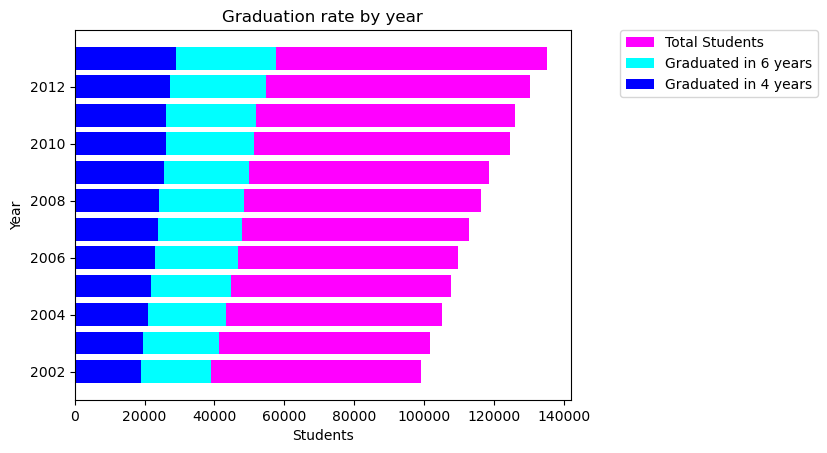

In [75]:
plt.rcdefaults()
fig, ax = plt.subplots()
y=by_year['year']
xtotal= by_year['grad_cohort']
x150= by_year['grad_150']
x100=by_year['grad_100']

ax.barh(y,xtotal, label='Total Students', color='magenta')
ax.barh(y,x150,color= 'cyan', label='Graduated in 6 years')
ax.barh(y,x100,color='blue', label='Graduated in 4 years')

ax.set_xlabel('Students')
ax.set_ylabel('Year')
ax.set_title('Graduation rate by year')
ax.legend(loc='best')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)

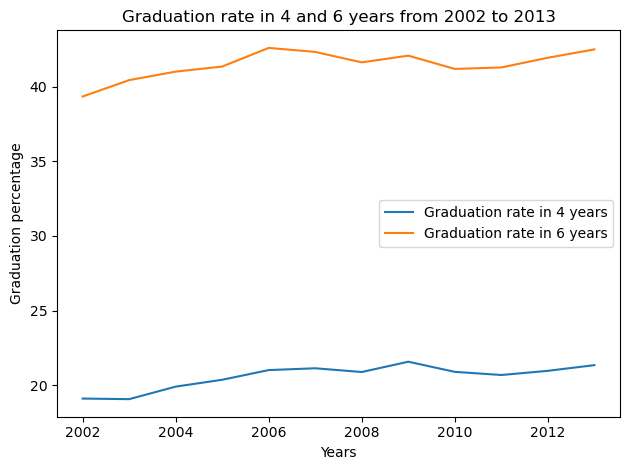

In [76]:
#by_year2
grad_rate100= (by_year['grad_100']/by_year['grad_cohort'])*100
grad_rate100= round(grad_rate100,2)
grad_rate150= (by_year['grad_150']/by_year['grad_cohort'])*100
grad_rate150= round(grad_rate150,2)
years= by_year['year']
plt.plot(years, grad_rate100, label= 'Graduation rate in 4 years')
plt.plot(years, grad_rate150, label= 'Graduation rate in 6 years')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Graduation percentage')
plt.title("Graduation rate in 4 and 6 years from 2002 to 2013")
plt.tight_layout()
plt.show()

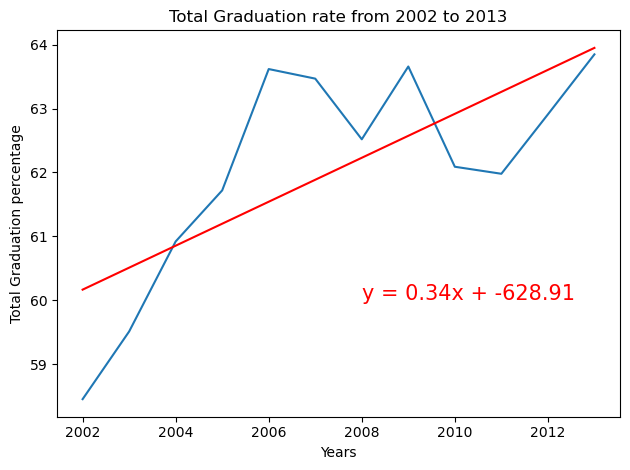

The r-squared is: 0.5281458704797771


In [77]:
total_grad_rate = grad_rate100 + grad_rate150
fig= plt.plot(kind='line')
plt.plot(years ,total_grad_rate)
plt.xlabel('Years')
plt.ylabel('Total Graduation percentage')
plt.title("Total Graduation rate from 2002 to 2013")
plt.tight_layout()

#linear regression on total graduation rate
# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(years, total_grad_rate)
regress_values = years * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(years,regress_values,"r-")
plt.annotate(line_eq,(2008,60),fontsize=15,color="red")
plt.show()

print(f"The r-squared is: {rvalue**2}")

In [78]:
Inst = pd.read_csv('Inst.csv')
Inst_control = Inst[['unitid', 'chronname', 'city', 'state', 'level', 'control','student_count', 'aid_value', 
            'grad_100_value', 'grad_150_value']]
Inst_control.head()

,unitid,chronname,city,state,level,control,student_count,aid_value,grad_100_value,grad_150_value
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,4051,7142.0,10.0,29.1
1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,11502,6088.0,29.4,53.5
2,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,5696,6647.0,16.5,48.4
3,100724,Alabama State University,Montgomery,Alabama,4-year,Public,5356,7256.0,8.8,25.2
4,100751,University of Alabama at Tuscaloosa,Tuscaloosa,Alabama,4-year,Public,29440,10390.0,42.7,66.7


In [79]:
public = Inst.loc[Inst['control'] == 'Public']
public_grad_mean = round(public['grad_100_value'].mean(), 2)
public_grad150_mean = round(public['grad_150_value'].mean(), 2)
print(f"{public_grad_mean}, {public_grad150_mean}")

27.25, 49.35


In [80]:
profit = Inst.loc[Inst['control'] == 'Private for-profit']
profit_grad_mean = round(profit['grad_100_value'].mean(), 2)
profit_grad150_mean = round(profit['grad_150_value'].mean(), 2)
print(f"{profit_grad_mean}, {profit_grad150_mean}")

38.4, 46.39


In [81]:
nonprofit = Inst.loc[Inst['control'] == 'Private not-for-profit']
nonprofit_grad_mean = round(nonprofit['grad_100_value'].mean(), 2)
nonprofit_grad150_mean = round(nonprofit['grad_150_value'].mean(), 2)
print(f"{nonprofit_grad_mean}, {nonprofit_grad150_mean}")

45.47, 57.77


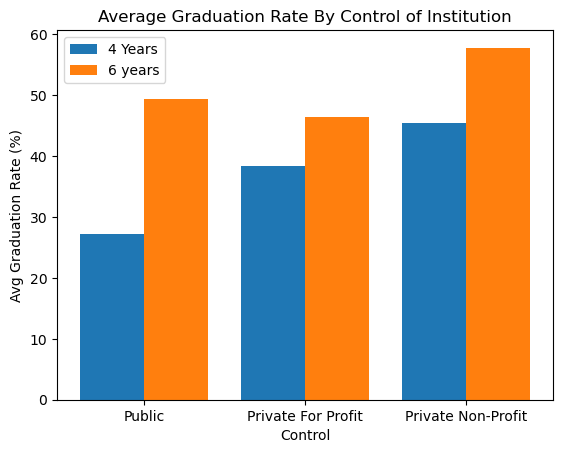

Public Graduation Rates: 27.25% in 4 years, 49.35% in 6 years.
Private For Profit Graduation Rates: 38.4% in 4 years, 46.39% in 6 years.
Private Non-Profit Graduation Rates: 45.47% in 4 years, 57.77% in 6 years.


In [82]:
first_gradvals = [public_grad_mean, profit_grad_mean, nonprofit_grad_mean]
second_gradvals = [public_grad150_mean, profit_grad150_mean, nonprofit_grad150_mean]

labels = ['Public', 'Private For Profit', 'Private Non-Profit']
ticks = np.arange(len(labels))
plt.bar(ticks - 0.2, first_gradvals, 0.4)
plt.bar(ticks + 0.2, second_gradvals, 0.4)
plt.xticks(ticks, labels)
plt.legend(['4 Years', '6 years'], loc='best')
plt.title('Average Graduation Rate By Control of Institution')
plt.xlabel('Control')
plt.ylabel('Avg Graduation Rate (%)')
plt.show()
print(f"Public Graduation Rates: {public_grad_mean}% in 4 years, {public_grad150_mean}% in 6 years.")
print(f"Private For Profit Graduation Rates: {profit_grad_mean}% in 4 years, {profit_grad150_mean}% in 6 years.")
print(f"Private Non-Profit Graduation Rates: {nonprofit_grad_mean}% in 4 years, {nonprofit_grad150_mean}% in 6 years.")

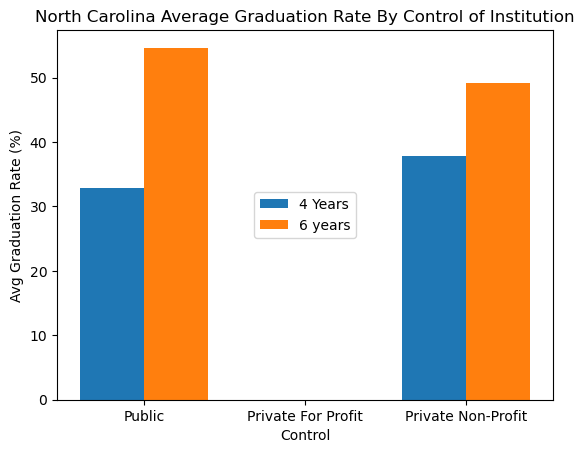

Public Graduation Rates: 32.84% in 4 years, 54.64% in 6 years.
Private For Profit Graduation Rates: nan% in 4 years, nan% in 6 years.
Private Non-Profit Graduation Rates: 37.84% in 4 years, 49.18% in 6 years.


In [83]:
NC_df = Inst.loc[Inst['state'] == 'North Carolina']
ncpublic = NC_df.loc[NC_df['control'] == 'Public']
ncprofit = NC_df.loc[NC_df['control'] == 'Private for-profit']
ncnonprofit = NC_df.loc[NC_df['control'] == 'Private not-for-profit']

ncpublic_grad_mean = round(ncpublic['grad_100_value'].mean(), 2)
ncpublic_grad150_mean = round(ncpublic['grad_150_value'].mean(), 2)

ncprofit_grad_mean = round(ncprofit['grad_100_value'].mean(), 2)
ncprofit_grad150_mean = round(ncprofit['grad_150_value'].mean(), 2)

ncnonprofit_grad_mean = round(ncnonprofit['grad_100_value'].mean(), 2)
ncnonprofit_grad150_mean = round(ncnonprofit['grad_150_value'].mean(), 2)


first_ncgradvals = [ncpublic_grad_mean, ncprofit_grad_mean, ncnonprofit_grad_mean]
second_ncgradvals = [ncpublic_grad150_mean, ncprofit_grad150_mean, ncnonprofit_grad150_mean]

labels = ['Public', 'Private For Profit', 'Private Non-Profit']
ticks = np.arange(len(labels))
plt.bar(ticks - 0.2, first_ncgradvals, 0.4)
plt.bar(ticks + 0.2, second_ncgradvals, 0.4)
plt.xticks(ticks, labels)
plt.legend(['4 Years', '6 years'], loc='center')
plt.title('North Carolina Average Graduation Rate By Control of Institution')
plt.xlabel('Control')
plt.ylabel('Avg Graduation Rate (%)')
plt.show()
print(f"Public Graduation Rates: {ncpublic_grad_mean}% in 4 years, {ncpublic_grad150_mean}% in 6 years.")
print(f"Private For Profit Graduation Rates: {ncprofit_grad_mean}% in 4 years, {ncprofit_grad150_mean}% in 6 years.")
print(f"Private Non-Profit Graduation Rates: {ncnonprofit_grad_mean}% in 4 years, {ncnonprofit_grad150_mean}% in 6 years.")


North Carolina Grad vs Aid

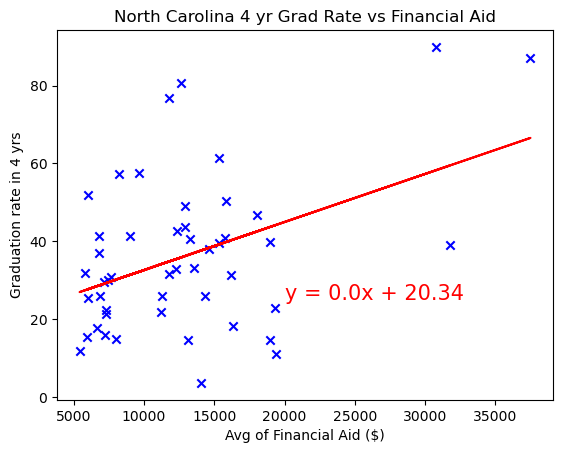

The r-squared is: 0.18359997966269082
The line equation is: y = 0.0x + 20.34


In [84]:
NC_df = Inst.loc[Inst['state'] == 'North Carolina']

x_value = NC_df['aid_value']
y_value = NC_df['grad_100_value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, color='b', marker='x')
plt.plot(x_value, regress_value, "r-")
plt.ylabel('Graduation rate in 4 yrs')
plt.xlabel('Avg of Financial Aid ($)')
plt.title('North Carolina 4 yr Grad Rate vs Financial Aid')
plt.annotate(line_eq, (20000,25), fontsize=15, color="red")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f"The line equation is: {line_eq}")

#correlation = pearsonr(x_value, y_value)
#print(f'The correlation is {round(correlation[0],2)}')
#plt.savefig(".png")

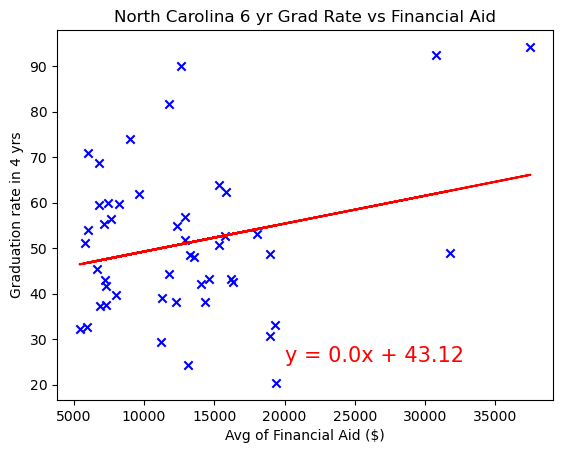

The r-squared is: 0.06301810994013483


In [85]:
x_value = NC_df['aid_value']
y_value = NC_df['grad_150_value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, color='b', marker='x')
plt.plot(x_value, regress_value, "r-")
plt.ylabel('Graduation rate in 4 yrs')
plt.xlabel('Avg of Financial Aid ($)')
plt.title('North Carolina 6 yr Grad Rate vs Financial Aid')
plt.annotate(line_eq, (20000,25), fontsize=15, color="red")
plt.show()
print(f"The r-squared is: {rvalue**2}")
#print(f"The line equation is: {line_eq}")

#correlation = st.pearsonr(x_value, y_value)
#print(f'The correlation is {round(correlation[0],2)}')
#plt.savefig(".png")

North Carolina Grad vs Med SAT

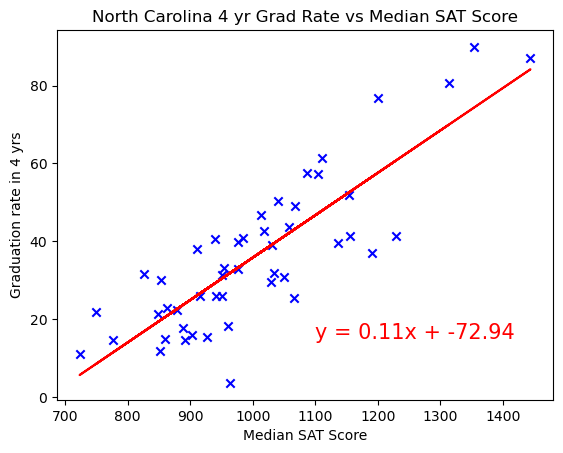

The r-squared is: 0.7040996974495375
The line equation is: y = 0.11x + -72.94


In [86]:
x_value = NC_df['med_sat_value']
y_value = NC_df['grad_100_value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, color='b', marker='x')
plt.plot(x_value, regress_value, "r-")
plt.ylabel('Graduation rate in 4 yrs')
plt.xlabel('Median SAT Score')
plt.title('North Carolina 4 yr Grad Rate vs Median SAT Score')
plt.annotate(line_eq, (1100,15), fontsize=15, color="red")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f"The line equation is: {line_eq}")

#correlation = st.pearsonr(x_value, y_value)
#print(f'The correlation is {round(correlation[0],2)}')
#plt.savefig(".png")

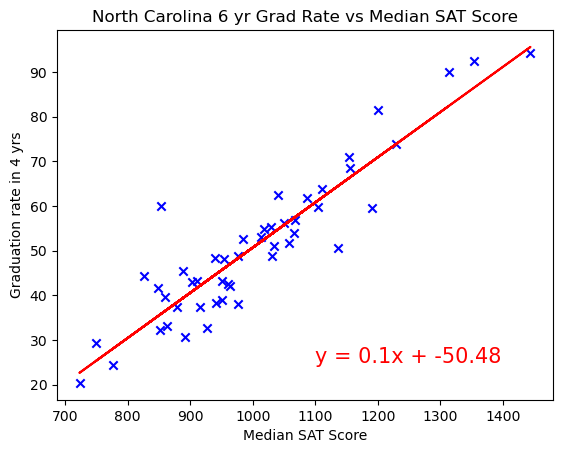

The r-squared is: 0.8440578201127729
The line equation is: y = 0.1x + -50.48


In [87]:
x_value = NC_df['med_sat_value']
y_value = NC_df['grad_150_value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, color='b', marker='x')
plt.plot(x_value, regress_value, "r-")
plt.ylabel('Graduation rate in 4 yrs')
plt.xlabel('Median SAT Score')
plt.title('North Carolina 6 yr Grad Rate vs Median SAT Score')
plt.annotate(line_eq, (1100,25), fontsize=15, color="red")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f"The line equation is: {line_eq}")

#correlation = st.pearsonr(x_value, y_value)
#print(f'The correlation is {round(correlation[0],2)}')
#plt.savefig(".png")

In [178]:
Grads

,unitid,state,year,control,grad_cohort,grad_100,grad_150
0,100654,Alabama,2002,Public,680.0,139.0,263.0
1,100654,Alabama,2003,Public,748.0,153.0,288.0
2,100654,Alabama,2004,Public,955.0,173.0,314.0
3,100654,Alabama,2005,Public,"1,046.0",91.0,339.0
4,100654,Alabama,2006,Public,967.0,112.0,326.0
...,...,...,...,...,...,...,...
15487,454184,New York,2012,Private not-for-profit,1.0,0.0,0.0
15488,454184,New York,2013,Private not-for-profit,1.0,1.0,1.0
15489,462354,California,2011,Private not-for-profit,0.0,0.0,0.0
15490,462354,California,2012,Private not-for-profit,1.0,0.0,0.0


In [187]:
list_control = Grads["state"].tolist

list_control

<bound method IndexOpsMixin.tolist of 0           Alabama
1           Alabama
2           Alabama
3           Alabama
4           Alabama
            ...    
15487      New York
15488      New York
15489    California
15490    California
15491    California
Name: state, Length: 15492, dtype: object>

In [188]:
group_by_control = Grads.groupby(["state"]).count()

group_by_control

,unitid,year,control,grad_cohort,grad_100,grad_150
state,,,,,,
Alabama,264,264,264,264,264,264
Alaska,12,12,12,12,12,12
Arizona,72,72,72,72,72,72
Arkansas,204,204,204,204,204,204
California,954,954,954,954,954,954
Colorado,180,180,180,180,180,180
Connecticut,168,168,168,168,168,168
Delaware,36,36,36,36,36,36
District of Columbia,72,72,72,72,72,72


In [215]:
dict={"totals": [2446.0 , 4776.0], "labels":["grad_100", "grad_150"]}

NC = pd.DataFrame(dict)

NC

,totals,labels
0,"2,446.0",grad_100
1,"4,776.0",grad_150


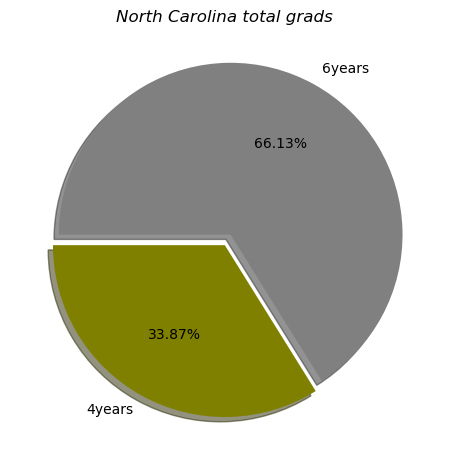

In [217]:
labels = [ "4years", "6years"]

y = NC["totals"]

colors = ["Olive","Grey"]

explode = (0,0.07)

plt.pie(y, explode=explode, colors = colors, labels=labels,
autopct='%1.2f%%', shadow=True, startangle=180)

plt.title(label="North Carolina total grads",loc="center",fontstyle='italic')

plt.tight_layout()

plt.show()